In [138]:
import pandas as pd
# Wczytajmy nasz oczyszczony dataset "sales.csv" 
sales = pd.read_csv("sales.csv")

In [139]:
# Podzielmy nasz zbiór sales na zbiór treningowy i testowy 
# (zbiór testowy powinien zawierać 20% wszystkich obserwacji, zbiór treningowy 80%) 
# dopasuj więc prawidłową wartość parametru test_size
# hint: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(sales, test_size=0.2)

# od tego momentu nie używamy już zbioru testowego, odkładamy go na bok - skorzystamy z niego w momencie ewaluacji modelu

In [140]:
assert len(test_df) == 910 

In [141]:
from sklearn import linear_model
# Utwórzmy obiekt reprezentujący nasz model regresji liniowej 
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression
model = linear_model.LinearRegression() # TODO: defaultowe parametry będą tutaj OK 

In [142]:
# Zapoznajmy się z metodą fit modelu Regresji Liniowej 
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [143]:
# Wybierzmy kolumny na których chcemy oprzeć naszą predykcję - zapiszmy je w X 
# W naszym wypadku do X trafią wszystkie kolumy zbioru treningowego oprócz "Sales" oraz "Influencer" - w poprzednim zadaniu 
# zamieniliśmy Influencer na InfluencerNumeric i to tej kolumny chcemu tu użyć 

# pamiętaj żeby użyć do uczenia  zbioru treningowego train_df 

X = train_df[['Radio', 'TV', 'Social Media', 'InfluencerNumeric']] 

# Kolumnę którą predykujemy zapiszmy do Y 
Y = train_df['Sales'] # TODO: Predykujemy Sprzedaż 

In [144]:
assert Y.name == 'Sales'
assert set(X.columns.tolist()) == set(['Radio', 'TV', 'Social Media', 'InfluencerNumeric'])

In [145]:
fitted_model = model.fit(X,Y) # TODO Zaaplikujmy metodę fit na naszych danych X, Y 
# To uruchomi bardzo krótko trwającą procedurę uczenia parametrów 
# fitted_model zawiera nauczony model 


In [146]:
# Chcemy teraz wytestować nasz nauczony model 
# wracamy więc do test_df 

# Przypiszmy predykowane wartości sprzedaży do dataframe'u test_df (utwórzmy nową kolumnę "predicted_sales" )
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.assign.html
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict


test_X = test_df[['Radio', 'TV', 'Social Media', 'InfluencerNumeric']]

test_df = test_df.assign(
    predicted_sales = fitted_model.predict(test_X)
)


<Axes: >

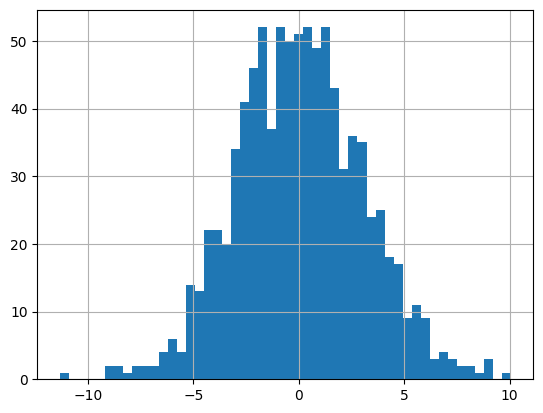

In [147]:
# Utwórzmy pd.Series zawierającą wszystkie różnice między predykowaną sprzedażą a sprzedażą prawdziwą 
# następnie pokażmy histogram tych różnic 

(test_df.predicted_sales - test_df.Sales).hist(bins=50)

<Figure size 1600x1200 with 0 Axes>

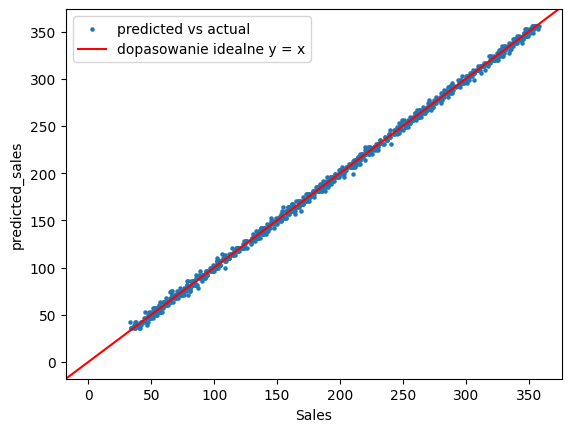

In [148]:
# Wyprodukujmy też scatter plot który pokazuje dopasowanie względem y = x 
from matplotlib import pyplot as plt 
plt.figure(figsize=(16,12))
ax = test_df.plot(x='Sales', y='predicted_sales', kind='scatter', marker='.', label='predicted vs actual')
ax.axline((0,0), slope=1, color='red', label = 'dopasowanie idealne y = x')
plt.legend()

In [153]:
# wykonajmy teraz predykcje sprzedaży dla nowej kampani reklamowej 
# na którą przeznaczono następujący budżet:

# Radio: 50M 
# TV: 10M 
# Social Media: 4M (gdzie współpracowano z Mega influencerem - InfluencerNumeric = 4.0)

# Musimy skonstruować kompatybilny input 
# Naszym inputem był dataframe - utwórzmy więc sobie pusty DF o strukturze jak nasza 
def get_single_input_vector(radio: float, tv: float, social_media: float, influencer_numeric: float):
    input_df = pd.DataFrame(columns=['Radio', 'TV','Social Media', 'InfluencerNumeric'])
    return input_df.assign(
        **{
            "Social Media": [social_media], 'Radio': [radio], 'TV': [tv],  'InfluencerNumeric': [influencer_numeric]
        }
    )    

fitted_model.predict(
    get_single_input_vector(radio=50,tv=10, social_media = 4, influencer_numeric=4.0)
)

array([35.29953631])

In [154]:
# Wypróbuj predykcję dla innych wartości budżetow:
# TODO 

# skopiuj kod poniżej i poeksperymentuj z inputem 
# fitted_model.predict(
#    get_single_input_vector(radio=50,tv=10, social_media = 4, influencer_numeric=4.0)
#) 

# TODO: Spróbujmy ocenić zmiana jakiego parametru powoduje 
# największa zmianę w przewidywanej sprzedaży 

<Axes: >

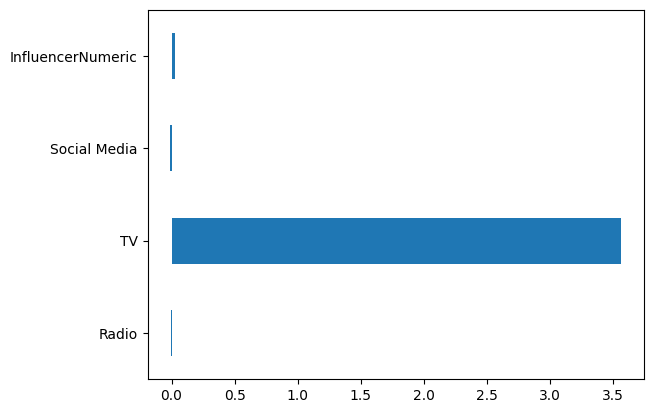

In [155]:
# Jeśli już udał się odgadnąć najbardziej istotną cechę która wpływa na sprzedaż 
# możemy tę samą informację zobaczyć w wartościach parametrów modelu:

# parametr (waga) budżetu wydane na TV jest zdecydowanie wyższa niż pozostałe (które są bliskie zeru) 
pd.Series(
    dict(zip(fitted_model.feature_names_in_, fitted_model.coef_))
).plot(kind='barh')